# Setup

In [47]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "pokemon_plots"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Get the Data

In [48]:
import pandas as pd

CSV_PATH = PROJECT_ROOT_DIR + "/datasets" + "/pokemon" + "/Pokemon.csv"

def load_data() :
    return pd.read_csv(CSV_PATH)

# Data Structure

In [49]:
pm_data = load_data()
pm_data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [50]:
# .info(): to get a quick description of the data
pm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [51]:
# .edscirbe(): summary of the numerical attributes
pm_data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [52]:
# Change into upper case
pm_data.columns = pm_data.columns.str.upper().str.replace('_', '')
pm_data.head()

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [53]:
# Showing the legendary pokemons
pm_data[pm_data['LEGENDARY']==True].head(5)

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


# Clean the Data

In [54]:
# Remove mega pokemos
pm_data = pm_data[pm_data['NAME'].str.contains("Mega") == False]
pm_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 751 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           751 non-null    int64 
 1   NAME        751 non-null    object
 2   TYPE 1      751 non-null    object
 3   TYPE 2      375 non-null    object
 4   TOTAL       751 non-null    int64 
 5   HP          751 non-null    int64 
 6   ATTACK      751 non-null    int64 
 7   DEFENSE     751 non-null    int64 
 8   SP. ATK     751 non-null    int64 
 9   SP. DEF     751 non-null    int64 
 10  SPEED       751 non-null    int64 
 11  GENERATION  751 non-null    int64 
 12  LEGENDARY   751 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 77.0+ KB


In [55]:
pm_data.head()

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


The indexes are not consecutive if we remove the rows in this way. Maybe it doesn't matter since we can know which rows are removed?

In [67]:
pm_data[pm_data['TYPE 2'] == '']

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY


In [69]:
# Shows all the unique types in column
print('The unique  pokemon types are', pm_data['TYPE 1'].unique())
print('The number of unique types are', pm_data['TYPE 1'].nunique()) #shows count of unique values 

The unique  pokemon types are ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
The number of unique types are 18


In [79]:
pm_data['TYPE 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

# Visualization

In [111]:
print(min(pm_data['ATTACK']))
print(max(pm_data['ATTACK']))

5
180


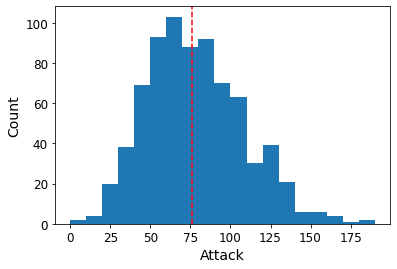

In [113]:
%matplotlib inline
import matplotlib.pyplot as plt
bins=range(0,200,10) #they act as containers
plt.hist(pm_data['ATTACK'], bins=bins)
plt.xlabel('Attack') #set the xlabel name
plt.ylabel('Count') #set the ylabel name
plt.plot()
plt.axvline(pm_data['ATTACK'].mean(),linestyle='dashed',color='red') #draw a vertical line showing the av

In [95]:
max(pm_data['ATTACK'])

180

In [132]:
# Prepare to draw a pie chart. size() returns a "Series"
type_sum = pm_data.groupby(['TYPE 1']).size().reset_index(name='COUNTS')
type_sum

,TYPE 1,COUNTS
0,Bug,65
1,Dark,28
2,Dragon,26
3,Electric,42
4,Fairy,17
5,Fighting,25
6,Fire,48
7,Flying,4
8,Ghost,30
9,Grass,66


In [133]:
type_color = {'Dark': '#705746', 
              'Dragon': '#6F35FC',
              'Bug': '#A6B91A',
              'Electric': '#F7D02C',
              'Fairy': '#D685AD',
              'Fighting': '#C22E28',
              'Fire': '#EE8130',
              'Flying': '#A98FF3',
              'Ghost': '#735797',
              'Grass': '#7AC74C',
              'Ground': '#E2BF65',
              'Ice': '#96D9D6',
              'Normal': '#A8A77A',
              'Poison': '#A33EA1',
              'Psychic': '#F95587',
              'Rock': '#B6A136',
              'Steel': '#B7B7CE',
              'Water': '#6390F0'
            }
type_sum['COLOR'] = type_sum['TYPE 1'].map(type_color)

In [134]:
type_sum

,TYPE 1,COUNTS,COLOR
0,Bug,65,#A6B91A
1,Dark,28,#705746
2,Dragon,26,#6F35FC
3,Electric,42,#F7D02C
4,Fairy,17,#D685AD
5,Fighting,25,#C22E28
6,Fire,48,#EE8130
7,Flying,4,#A98FF3
8,Ghost,30,#735797
9,Grass,66,#7AC74C


([<matplotlib.patches.Wedge at 0x409b20f0a0>,
 [Text(1.059585999939612, 0.2954276708975865, 'Bug'),
  Text(0.8683519882929106, 0.6752516748796326, 'Dark'),
  Text(0.6950499675693178, 0.8525875571352719, 'Dragon'),
  Text(0.42785031416435265, 1.01338250856696, 'Electric'),
  Text(0.16730415969674212, 1.0872025193808958, 'Fairy'),
  Text(-0.025306184447923593, 1.0997088692143424, 'Fighting'),
  Text(-0.3547632876156269, 1.0412218830586266, 'Fire'),
  Text(-0.571114935262407, 0.9401211255578809, 'Flying'),
  Text(-0.6986104246970484, 0.8496725689962046, 'Ghost'),
  Text(-0.975150629306644, 0.5090002457394852, 'Grass'),
  Text(-1.0972196642328762, 0.07816014598690718, 'Ground'),
  Text(-1.086131322259357, -0.1741228038113934, 'Ice'),
  Text(-0.8767575444062616, -0.6643012933351119, 'Normal'),
  Text(-0.4405338508604752, -1.0079334929676862, 'Poison'),
  Text(-0.08504342912204786, -1.0967076251960517, 'Psychic'),
  Text(0.33729182928957363, -1.0470120447704951, 'Rock'),
  Text(0.60225108876

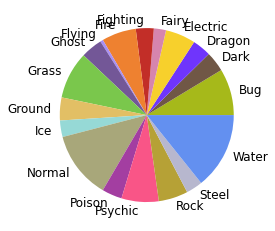

In [137]:
plt.pie(type_sum['COUNTS'], labels = type_sum['TYPE 1'], colors = type_sum['COLOR'])